In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Confusion matrix & metrics

In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
##(1) Logistic Regression

In [3]:
from sklearn.datasets import load_breast_cancer

In [34]:
df=load_breast_cancer()

In [35]:
print(df.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [36]:
X=df['data']
y=df['target']


In [37]:
model = LogisticRegression().fit(X,y)

y_score = model.decision_function(X)  
y_pred = model.predict(X)

# decision_function(): 판별함수 결과값 계산
# predict(): y_score가 양수이면 y=1, 음수이면 y=0으로 분류

C:\Users\82107\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

In [39]:
print(confusion_matrix(y, y_pred)) # TP FN FP TN

[[198  14]
 [  9 348]]


In [40]:
print('accuracy score: ',accuracy_score(y, y_pred) )
print('precision score: ',precision_score(y, y_pred) )
print('recall score: ',recall_score(y, y_pred) )
print('f1 score: ',f1_score(y, y_pred) )

accuracy score:  0.9595782073813708
precision score:  0.9613259668508287
recall score:  0.9747899159663865
f1 score:  0.968011126564673


In [41]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       212
           1       0.96      0.97      0.97       357

    accuracy                           0.96       569
   macro avg       0.96      0.95      0.96       569
weighted avg       0.96      0.96      0.96       569



In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [43]:
model = LogisticRegression().fit(X,y)
y_score = model.fit(X_train, y_train).decision_function(X_test)
y_pred = model.fit(X_train, y_train).predict(X_test)

C:\Users\82107\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\82107\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\82107\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
from sklearn.metrics import roc_curve
# calculate AUC
roc_auc = roc_auc_score(y_test, y_score)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [45]:
print(roc_auc)

0.9896929824561403


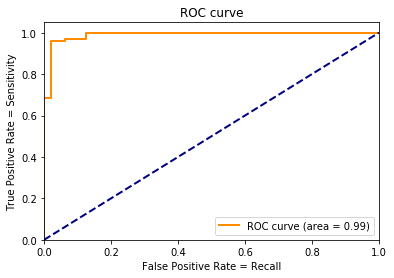

In [46]:
plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
##ROC curve의 AUC값이 두 모델에서 너무 유사해서 PR 곡선도 그려보려고 한다. 

In [47]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.99')

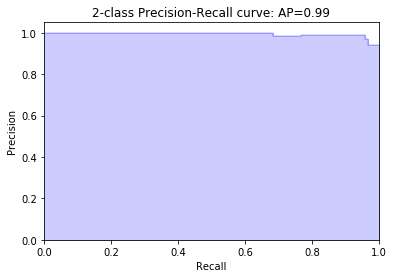

In [48]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(y_test, y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))


In [ ]:
## (2)Decision Tree Classification

In [49]:
X=df['data']

In [50]:
y=df['target']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
clf = DecisionTreeClassifier()

In [54]:
clf = clf.fit(X_train,y_train)

In [55]:
y_pred = clf.predict(X_test)

In [56]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9090909090909091


In [57]:
y_score = model.decision_function(X_test)  
roc_auc = roc_auc_score(y_test, y_score)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [58]:
print(roc_auc)

0.9913355874894336


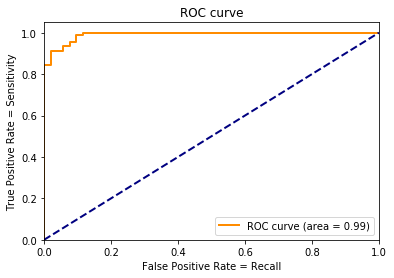

In [59]:
plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [60]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

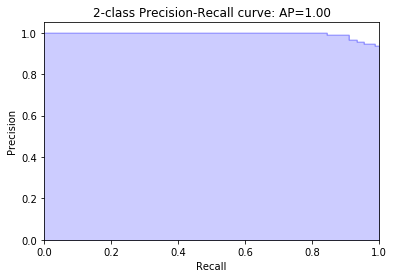

In [61]:
precision, recall, _ = precision_recall_curve(y_test, y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))


# 3. Cross Validation

In [62]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [63]:
cv = KFold(n_splits=3, shuffle=True, random_state=0)

for train_index, test_index in cv.split(X):
    print(X[train_index], y[test_index])
    
# cv.split(X)는 X를 k-fold로 나눈 뒤 각 fold에서의 (train_index, test_index)를 반환하는 iterable

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 ... 2.575e-01 6.638e-01 1.730e-01]
 ...
 [1.120e+01 2.937e+01 7.067e+01 ... 0.000e+00 1.566e-01 5.905e-02]
 [2.092e+01 2.509e+01 1.430e+02 ... 2.542e-01 2.929e-01 9.873e-02]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] [0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1
 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0
 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0]
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.142e+01 2.038e+01 7.758e+01 ... 2.575e-01 6.638e-01 1.730e-01]
 ...

In [64]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0) # target이 골고루 분포되도록 shuffle 옵션

In [65]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=kfold)  # cross_val_score(모델, 데이터, 타깃)
scores # 각 fold에 대한 score

array([0.9122807 , 0.92105263, 0.92982456, 0.93859649, 0.92035398])

In [66]:
scores = cross_val_score(DecisionTreeClassifier(), X, y) 
scores 
# cross_val_score의 기본값은 k=3

C:\Users\82107\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.91578947, 0.93684211, 0.85714286])

In [67]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores
# cross_val_score는 기본적으로 분류 모델에 대해 StratifiedKfold 사용

array([0.91304348, 0.93043478, 0.92035398, 0.95575221, 0.88495575])

In [68]:
display(scores.mean(), scores.var()) # 교차검증 점수들의 평균과 분산 확인

0.9209080415544442

0.0005319200965357825

# 4. Grid Search

In [69]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [70]:
X_train, X_test, y_train,y_test = train_test_split( X,y, test_size = 0.2, random_state = 121)

In [71]:
dtree = DecisionTreeClassifier()

In [72]:
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [73]:
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 3, refit = True)

In [74]:
grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_

In [75]:
scores_df = pd.DataFrame(grid_dtree.cv_results_)

In [76]:
scores_df[['params', 'mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.898901,5,0.861842,0.921053,0.913907
1,"{'max_depth': 1, 'min_samples_split': 3}",0.898901,5,0.861842,0.921053,0.913907
2,"{'max_depth': 2, 'min_samples_split': 2}",0.925275,1,0.901316,0.921053,0.953642
3,"{'max_depth': 2, 'min_samples_split': 3}",0.923077,2,0.901316,0.921053,0.947020
4,"{'max_depth': 3, 'min_samples_split': 2}",0.923077,2,0.894737,0.927632,0.947020
5,"{'max_depth': 3, 'min_samples_split': 3}",0.920879,4,0.894737,0.927632,0.940397


In [77]:
print('GridSearchCV 최적 파라미터: ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터:  {'max_depth': 2, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9253


In [78]:
estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9386


In [ ]:
##처음 모델 돌렸을 때 90%보다 정확도가 향상되었다. 